In [2]:
import pandas as pd
import numpy as np

# Visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load the cleaned dataset
df = pd.read_csv("Downloads/piracyguard_dataset.csv")

# Show first 5 rows
df.head()

,Login_Count,Session_Duration_Min,Activation_Count,Device_Change_Count,Location_Changes,Debug_Attempt_Flag,Subscription_Status,Piracy_Label
0,36,23,4,0,3,0,1,1
1,15,123,7,4,7,0,0,1
2,19,289,5,1,0,0,0,0
3,22,231,3,2,0,0,0,0
4,34,216,4,0,7,0,0,0


In [5]:
# Dataset shape (rows, columns)
df.shape

(12000, 8)

In [6]:
df.columns

Index(['Login_Count', 'Session_Duration_Min', 'Activation_Count',
       'Device_Change_Count', 'Location_Changes', 'Debug_Attempt_Flag',
       'Subscription_Status', 'Piracy_Label'],
      dtype='object')

In [7]:
# Check distribution of piracy label
df["Piracy_Label"].value_counts()

Piracy_Label
1    6878
0    5122
Name: count, dtype: int64

In [8]:
# Features (all columns except target)
X = df.drop("Piracy_Label", axis=1)

# Target column
y = df["Piracy_Label"]

In [9]:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (12000, 7)
Target shape: (12000,)


In [10]:
X.head()

,Login_Count,Session_Duration_Min,Activation_Count,Device_Change_Count,Location_Changes,Debug_Attempt_Flag,Subscription_Status
0,36,23,4,0,3,0,1
1,15,123,7,4,7,0,0
2,19,289,5,1,0,0,0
3,22,231,3,2,0,0,0
4,34,216,4,0,7,0,0


In [11]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Piracy_Label, dtype: int64

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,      # 20% for testing
    train_size=0.80,     # 80% for training
    random_state=42,     # fixed for reproducibility
    shuffle=True
)

In [13]:
print("Training Features:", X_train.shape)
print("Testing Features:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Testing Labels:", y_test.shape)

Training Features: (9600, 7)
Testing Features: (2400, 7)
Training Labels: (9600,)
Testing Labels: (2400,)


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# Create Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

In [16]:
# Train the model using training data
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
# Predict piracy labels on test data
y_pred = log_reg.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00      1360

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



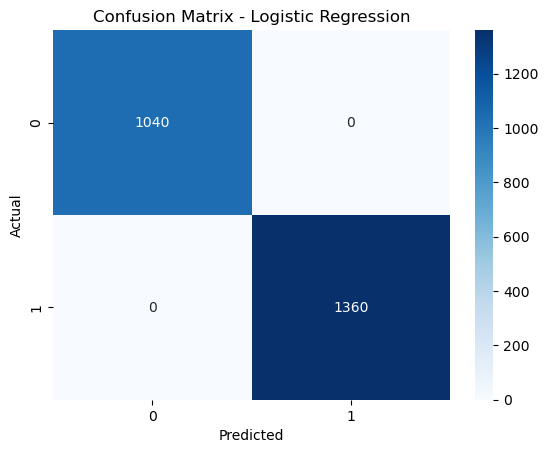

In [20]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    random_state=42,
    class_weight="balanced"  # important for piracy detection
)

In [23]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
rf_pred = rf_model.predict(X_test)

In [25]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 1.0


In [26]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00      1360

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



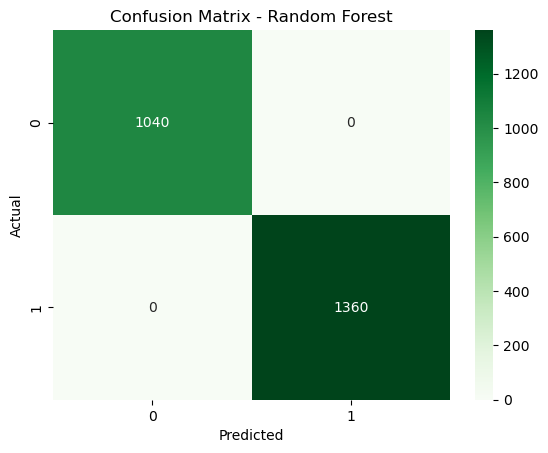

In [27]:
rf_cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [28]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

Device_Change_Count     0.599879
Subscription_Status     0.256752
Debug_Attempt_Flag      0.127613
Session_Duration_Min    0.006804
Login_Count             0.004601
Activation_Count        0.002266
Location_Changes        0.002085
dtype: float64

In [29]:
print("Logistic Regression Accuracy:", accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0


In [30]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))

print("\nRandom Forest Report:")
print(classification_report(y_test, rf_pred))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00      1360

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00      1360

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



In [31]:
final_model = rf_model

In [32]:
def check_id_mismatch(software_id, hardware_id, plugin_id):
    """
    Returns True if ANY ID mismatch is found
    """
    if software_id != hardware_id or software_id != plugin_id:
        return True
    return False

In [33]:
def piracy_decision_system(user_features, software_id, hardware_id, plugin_id):
    """
    user_features: single user data (DataFrame row)
    software_id, hardware_id, plugin_id: IDs to validate
    """

    # Step 1: AI prediction
    prediction = final_model.predict(user_features)[0]

    # Step 2: ID validation
    id_mismatch = check_id_mismatch(software_id, hardware_id, plugin_id)

    # Step 3: Decision logic
    if prediction == 1 and id_mismatch:
        action = "DESTRUCTION_TRIGGERED"
    elif prediction == 1 and not id_mismatch:
        action = "WARNING_ISSUED"
    else:
        action = "ACCESS_GRANTED"

    return {
        "AI_Prediction": "Pirated" if prediction == 1 else "Genuine",
        "ID_Mismatch": id_mismatch,
        "Final_Action": action
    }

In [34]:
# Take one sample from test data
sample_user = X_test.iloc[[0]]

# Simulated IDs
software_id = "ABC123"
hardware_id = "XYZ999"   # mismatch
plugin_id = "ABC123"

# Run piracy detection system
result = piracy_decision_system(
    sample_user,
    software_id,
    hardware_id,
    plugin_id
)

result

{'AI_Prediction': 'Pirated',
 'ID_Mismatch': True,
 'Final_Action': 'DESTRUCTION_TRIGGERED'}